# D'Alembert-ovo rješenje valne jednadžbe


## Rubni uvjeti na konačnoj domeni

Promotrimo problem početnih vrijednosti

\begin{align*}
&u_t+c\, u_x=0, \quad 0<x<1, \quad t>0,\quad c>0 \\
&u(x,0)=f(x).
\end{align*}

Rješenje je desni val 

$$
u(x,t)=f(x-ct),
$$

a karakteristične krivulje su pravci

$$
x(t)=ct+k,
$$

odnosno

$$
t(x)=\frac{1}{c}(x-k).
$$

U ovom slučaju možemo zadati i __rubni uvjet__ za $x=0$:

$$
u(0,t)=g(t).
$$

U desnom rubu, za $x=1$, rješenje je određeno karakterističnim pravcima: za $t\in[0,1/c]$ rješenje je određeno početnim uvjetom (plave linije), a za $t>1/c$ rješenje je određeno rubnim uvjetom (crvene linije).

In [2]:
using Gadfly

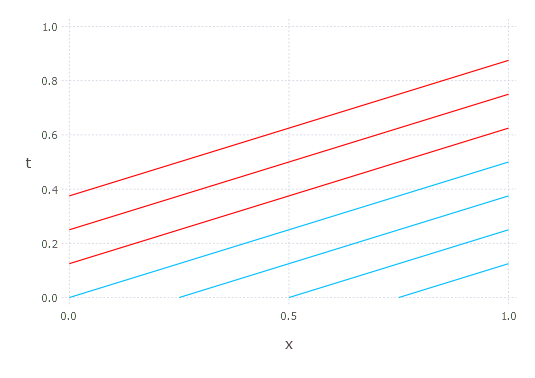

In [3]:
c=2
tx(x,k)=(x-k)/c
plot(layer(x->tx(x,0),0,1),
    layer(x->tx(x,0.25),0.25,1),
    layer(x->tx(x,0.5),0.5,1),
    layer(x->tx(x,0.75),0.75,1),
    layer(x->tx(x,-0.25),0,1,Theme(default_color=colorant"red")),
    layer(x->tx(x,-0.5),0,1,Theme(default_color=colorant"red")),
    layer(x->tx(x,-0.75),0,1,Theme(default_color=colorant"red")),
    Guide.xlabel("x"),Guide.ylabel("t"))

## D'Alembert-ovo rješenje


U prethodnom slučaju nema lijevih valova pa nema ni refleksije.

__Teorem:__ Rješenje problema početnih vrijednosti

\begin{align*}
&u_{tt}-c^2\, u_{xx}=0, \quad x\in\mathbb{R}, \quad t>0, \\
&u(x,0)=F(x), \quad u_t(x,0)=G(x)
\end{align*}

je

$$
u(x,t)=\frac{1}{2}[F(x+ct)+F(x-ct)]+\frac{1}{2c}
\int\limits_{x-ct}^{x+ct} G(y)\, dy.
$$

_Dokaz:_ Karakteristične krivulje su pravci, a rješenje je kombinacija lijevog i desnog vala pa ima oblik

$$
u(x,t)=f(x+ct)+g(x-ct).
$$

Vrijedi

\begin{align*}
u(x,0)&=f(x)+g(x)=F(x), \tag{1}\\
u_(x,0)&=f'(x)\cdot c+g'(x)\cdot (-c)=G(x),
\end{align*}

odnosno

$$
f'(x)-g'(x)=\frac{1}{c}G(x).
$$

Integriranje daje

$$
f(x)-g(x)=\frac{1}{c}\int G(x)\, dx=\frac{1}{c}\int\limits_0^x G(y)\, dy + C.\tag{2}
$$

Zbrajanje (1) i (2) daje

$$
f(x)=\frac{1}{2}F(x)+\frac{1}{2c}\int\limits_0^x G(y)\, dy+\frac{1}{2}C,
$$

a oduzimanje (2) od (1) daje

$$
g(x)=\frac{1}{2}F(x)-\frac{1}{2c}\int\limits_0^x G(y)\, dy-\frac{1}{2}C.
$$

Dakle, 

\begin{align*}
u(x,t)&=f(x+ct)+g(x-ct)\\
&=\frac{1}{2}[F(x+ct)+F(x-ct)] +\frac{1}{2c}\bigg[\int\limits_0^{x+ct} G(y)\, dy -
\int\limits_0^{x-ct} G(y)\, dy\bigg]
\end{align*}

i teorem je dokazan.

Vidimo da rješenje u točki $x_0,y_0$, $u(x_0,y_0)$, ovisi o početnim uvjetima na intervalu 
$x\in[x_0-c\, t_0,x_0+c\, t_0]$. 

Taj interval se zove __područje ovisnosti__ (_domain of dependence_) točke $(x_0,t_0)$. 

Slično, početni uvjeti na intervalu 
$x\in [x_1,x_2]$ utječu na rješenje unutar područja omeđenog pravcima 

$$
x+c\,t=x_1,\quad  x-c\,t=x_2, \quad t=0.
$$

To područje se zove __područje utjecaja__ (_region of influence_).

__Primjer:__ Riješenje problema

\begin{align*}
&u_{tt}-2\, u_{xx}=0, \quad x\in\mathbb{R}, \quad t>0, \\
&u(x,0)=e^{-x^2}, \quad u_t(x,0)=0,
\end{align*}

je 

$$
u(x,t)=\frac{1}{2} \big[ e^{-(x+\sqrt{2}\, t)^2} + e^{-(x-\sqrt{2}\, t)^2}\big].
$$

In [5]:
using PyPlot

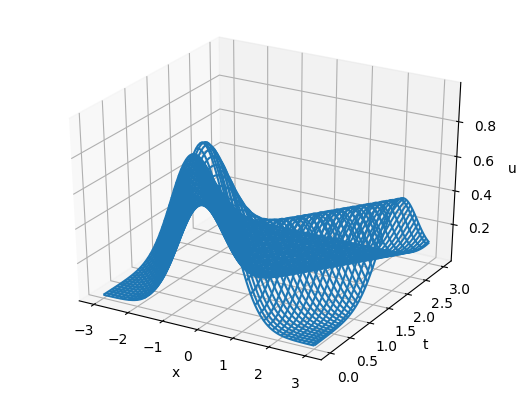

PyObject <matplotlib.text.Text object at 0x0000000049514128>

In [7]:
# Rješenje
gridsize=100
x=linspace(-3,3,gridsize)
t=linspace(0,3,gridsize)
X=repmat(x,1,gridsize)
T=repmat(t',gridsize,1)
u(x,t)=(exp.(-(x+sqrt(2)*t).^2)+exp.(-(x-sqrt(2)*t).^2))/2
U=[u(X[i,j],T[i,j]) for i=1:gridsize,j=1:gridsize]
mesh(X,T,U)
xlabel("x")
ylabel("t")
zlabel("u")

Za $k,h>0$ definirajmo točke

\begin{align*}
&A=(x-c\, k, t-h),\quad B=(x+c\,h,t+k), \\
&C=(x+c\,k,t+h),\quad D=(x-c\, h,t-k).
\end{align*}

__Lema:__ Funkcija $u(x,t)$ zadovoljava jednadžbu

$$
u_{tt}-c^2\, u_{xx}=0,\quad x\in\mathbb{R}, \quad t>0, \tag{3}
$$

ako i samo ako vrijedi

$$
u(A)+u(C)=u(B)+u(D).\tag{4}
$$

_Dokaz:_ Pretpostavimo da je 

$$
u(x,t)=f(x+c\,t)+g(x-c\,t)
$$

rješenje. Tada je

\begin{align*}
u(A)&=f(x-ck+c(t-h))+g(x-ck-c(t-h))\\
&=f(x-ck +ct-ch)+g(x-ck -ct+ch)\\
u(B)&=f(x+ch+c(t+k))+g(x+ch-c(t+k))\\
&=f(x+ch +ct+ck)+g(x+ch -ct-ck)\\
u(C)&=f(x+ck+c(t+h))+g(x+ck-c(t+h))\\
&=f(x+ck +ct+ck)+g(x+ck -ct-ch)\\
u(D)&=f(x-ch+c(t-k))+g(x-ch-c(t-k))\\
&=f(x-ch +ct-ck)+g(x-ch -ct+ck)
\end{align*}

pa (4) vrijedi.

Obrnuto, neka za $u(x,t)$ vrijedi (4).  Za $h=0$ vrijedi

$$
u(x-ck,t)+u(x+ck,t)=u(x,t+k)+u(x,t-k). \tag{5}
$$

Taylor-ova formula daje

\begin{align*} 
u(x-ck,t)&=u(x,t)+u_x(x,t)\cdot(-c)k+\frac{1}{2}u_{xx}(x,t)\cdot c^2k^2 +O(k^3)\\
u(x+ck,t)&=u(x,t)+u_x(x,t)\cdot ck+\frac{1}{2}u_{xx}(x,t)\cdot c^2k^2 +O(k^3)\\
u(x,t-k)&=u(x,t)+u_x(x,t)\cdot (-k)+\frac{1}{2}u_{tt}(x,t)\cdot k^2 +O(k^3)\\
u(x,t+k)&=u(x,t)+u_x(x,t)\cdot k+\frac{1}{2}u_{tt}(x,t)\cdot k^2 +O(k^3),
\end{align*}

pa uvrštavanje u (5), dijeljenje s $k^2$ i ignoriranje članova $O(k)$ daje (3).

[Slika]